<h1> Import necessary libraries </h1>

In [140]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print("Finished!")

Finished!


<h1> Ingest + prep data </h1>

In [141]:
# Reading data from the file
# http://archive.ics.uci.edu/ml/datasets/Heart+Disease
header_list = ["age", "sex", "cp", "resting_bp", "chol", "fbs", "restecg", "max_heart_rate", "exang", "oldpeak", "slope", "ca",
              "thal", "diagnosis"]

data =  pd.read_csv('processed.cleveland.data', sep=",", names=header_list)
data

,age,sex,cp,resting_bp,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [142]:
# Drop all except target columns
data_trim = data[['age', 'resting_bp', 'chol', 'max_heart_rate']]
data_trim

,age,resting_bp,chol,max_heart_rate
0,63.0,145.0,233.0,150.0
1,67.0,160.0,286.0,108.0
2,67.0,120.0,229.0,129.0
3,37.0,130.0,250.0,187.0
4,41.0,130.0,204.0,172.0
...,...,...,...,...
298,45.0,110.0,264.0,132.0
299,68.0,144.0,193.0,141.0
300,57.0,130.0,131.0,115.0
301,57.0,130.0,236.0,174.0


In [143]:
# Normalize all columns (put them on the same scale)
# Also called computing z-score
data_trim_norm = (data_trim - data_trim.mean())/data_trim.std()
data_trim_norm

,age,resting_bp,chol,max_heart_rate
0,0.947160,0.756274,-0.264463,0.017169
1,1.389703,1.608559,0.759159,-1.818896
2,1.389703,-0.664201,-0.341717,-0.900864
3,-1.929372,-0.096011,0.063869,1.634655
4,-1.486829,-0.096011,-0.824558,0.978917
...,...,...,...,...
298,-1.044285,-1.232391,0.334260,-0.769716
299,1.500339,0.699455,-1.037008,-0.376274
300,0.283345,-0.096011,-2.234453,-1.512885
301,0.283345,-0.096011,-0.206522,1.066349


<h1> K-means clustering </h1>

In [144]:
# Decide on k: two methods

# Elbow method

# Calculate the distortion for each number of clusters (k)
# Distortion is the average of the squared distances of all points in a cluster from the centroid.
# Here, starting with k 1-10

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_trim_norm)
    distortions.append(kmeanModel.inertia_)
    
# You can ignore the warning.

C:\Users\charl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


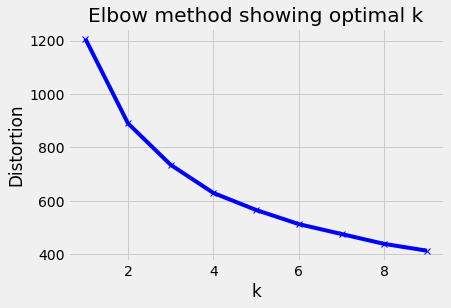

In [145]:
# Generate the elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method showing optimal k')
plt.show()

# Where is the "elbow?"
# What would you do if you don't see an elbow?

In [146]:
# Silhouette method

# The silhouette method measures how dissimilar the points within a cluster are from the points in other clusters, 
# i.e. the distance between clusters.
# Want to maximize silhouette coefficient.

# Set up the k-means algorithm (don't need to change these values)
kmeans_kwargs = {"init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

In [147]:
# Create a list to hold the silhouette coefficients for each k
silhouette_coefficients = []

# Create a for loop to generate silhouette coefficient for k 2-6 [from elbow plot]
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_trim_norm)
    score = silhouette_score(data_trim_norm, kmeans.labels_)
    silhouette_coefficients.append(score)

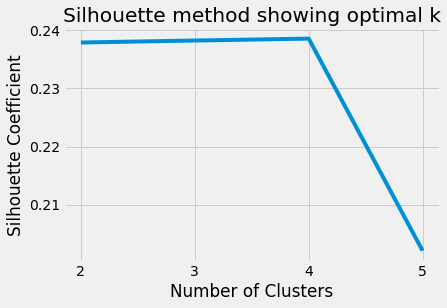

In [148]:
# Plot the silhouette coefficient against number of clusters; find the max
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette method showing optimal k')
plt.show()

In [149]:
# Generate clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_trim_norm)
output_kmeans = kmeans.predict(data_trim_norm)
output_kmeans

array([1, 1, 3, 2, 2, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 1, 2, 1, 0, 2, 3, 1,
       0, 2, 3, 2, 0, 3, 2, 3, 1, 2, 0, 1, 2, 2, 3, 3, 0, 1, 3, 2, 1, 1,
       0, 2, 3, 1, 0, 2, 2, 3, 2, 2, 3, 3, 2, 2, 0, 3, 0, 2, 3, 0, 3, 1,
       1, 1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 0, 2, 3, 2, 0, 2, 1, 0, 2, 2, 3,
       2, 2, 0, 1, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 0, 3, 2, 0, 1, 3, 3, 2,
       0, 3, 2, 0, 3, 2, 1, 2, 0, 3, 2, 0, 2, 3, 0, 2, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1,
       3, 3, 0, 0, 0, 0, 2, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 3, 1, 0, 1, 3,
       2, 3, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 3, 3, 3, 1, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 3, 3, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 0,
       2, 2, 2, 3, 0, 2, 2, 1, 3, 3, 2, 1, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 2, 3, 3, 1, 3, 2, 0, 1, 2,
       3, 0, 2, 3, 2, 2, 3, 1, 0, 3, 1, 1, 1, 2, 1, 3, 0, 2, 3, 2, 1, 0,
       1, 3, 2, 2, 1, 0, 2, 1, 3, 2, 3, 3, 2, 1, 3,

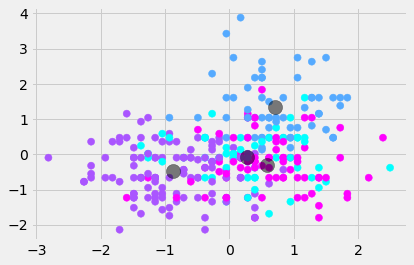

In [150]:
# Plot the clusters
plt.scatter(data_trim_norm.iloc[:, 0], data_trim_norm.iloc[:, 1], c=output_kmeans, s=50, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [151]:
# Add the cluster number as a new column in your *original* data frame
data['cluster'] = pd.Series(output_kmeans, index=data.index)
data

,age,sex,cp,resting_bp,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,diagnosis,cluster
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,3
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,2
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,2
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,2


<AxesSubplot:xlabel='diagnosis', ylabel='age'>

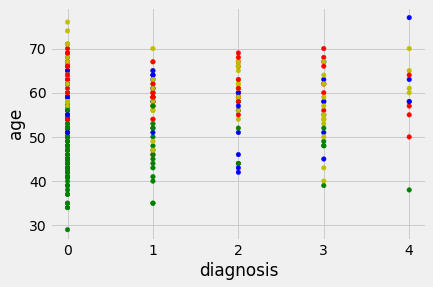

In [152]:
# Plotting example: age versus diagnosis versus cluster
color = data.cluster.map({0:'b', 1:'r', 2:'g', 3:'y'})
data.plot.scatter(x = 'diagnosis', y = 'age', c = color)

In [153]:
# Additional options:
# Use exploratory data analysis techniques to explore differences between clusters
cluster_0 = pd.DataFrame(data[data.cluster == 0].describe()) # cluster 0
cluster_0

,age,sex,cp,resting_bp,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,diagnosis,cluster
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,56.961538,0.519231,3.250000,130.384615,319.019231,0.173077,1.057692,154.057692,0.326923,1.051923,1.519231,1.019231,0.0
std,7.324312,0.504505,0.882843,11.641969,50.021364,0.382005,0.998302,14.894944,0.473665,1.124677,0.577024,1.290848,0.0
min,42.000000,0.000000,1.000000,102.000000,254.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,52.000000,0.000000,3.000000,123.750000,294.750000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,57.000000,1.000000,3.500000,130.000000,308.500000,0.000000,2.000000,156.500000,0.000000,0.900000,1.000000,0.000000,0.0
75%,63.000000,1.000000,4.000000,140.000000,331.250000,0.000000,2.000000,163.750000,1.000000,1.650000,2.000000,2.000000,0.0
max,77.000000,1.000000,4.000000,160.000000,564.000000,1.000000,2.000000,182.000000,1.000000,4.400000,3.000000,4.000000,0.0
